In [22]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from scipy.fft import fft2, ifft2

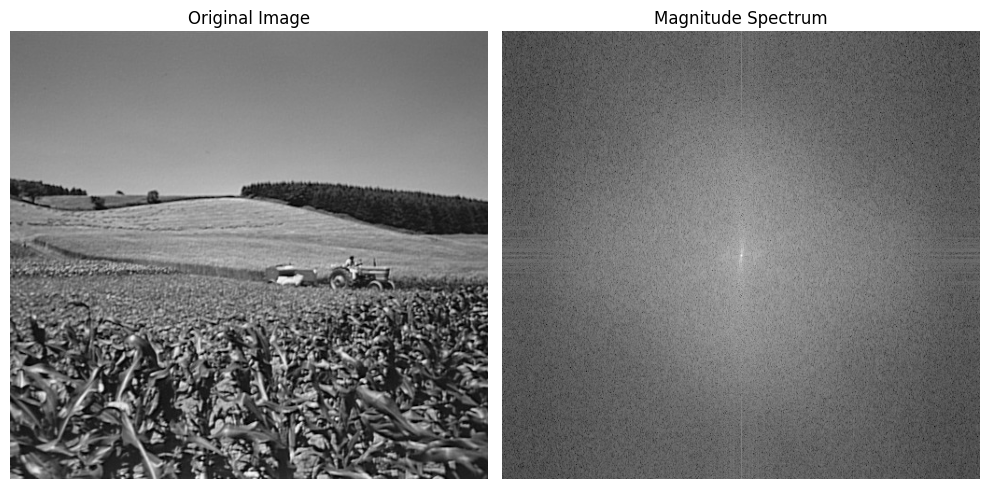

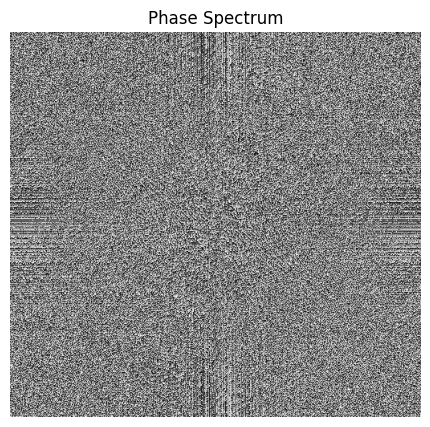

In [23]:
image = ski.io.imread("cornfield.jpg")

#Α
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Original Image")
axs[0].axis('off')

image_fft = fft2(image)
F_shifted = np.fft.fftshift(image_fft)

# Step A3: Get magnitude and phase
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

# Step A4: Plot magnitude and phase spectra
axs[1].imshow(np.log1p(magnitude), cmap="gray")
axs[1].set_title("Magnitude Spectrum")
axs[1].axis("off")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(phase, cmap="gray")
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()

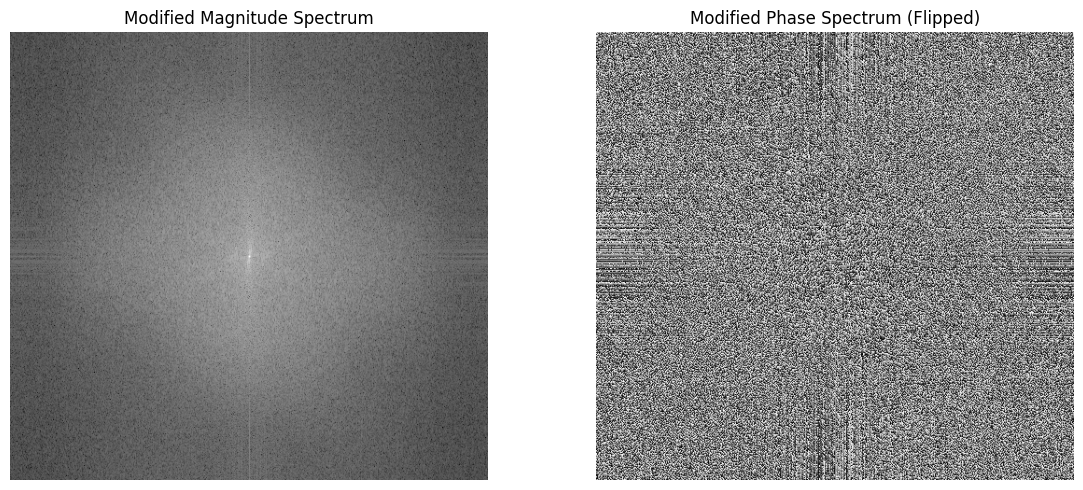

In [24]:
# Β1. Αντιστροφή της φάσης ως προς τον οριζόντιο άξονα (δηλαδή flip πάνω-κάτω)
phase_flipped = np.flipud(phase)

# Β2. Ανακατασκευή του τροποποιημένου φάσματος Fourier (με το ίδιο μέτρο)
F_modified = magnitude * np.exp(1j * phase_flipped)

# Β3. Εμφάνιση νέων φασμάτων πλάτους και φάσης
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Νέο φάσμα πλάτους (πρέπει να είναι ίδιο με πριν)
axs[0].imshow(np.log1p(np.abs(F_modified)), cmap="gray")
axs[0].set_title("Modified Magnitude Spectrum")
axs[0].axis("off")

# Νέο φάσμα φάσης (μετά την αναστροφή)
axs[1].imshow(np.angle(F_modified), cmap="gray")
axs[1].set_title("Modified Phase Spectrum (Flipped)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

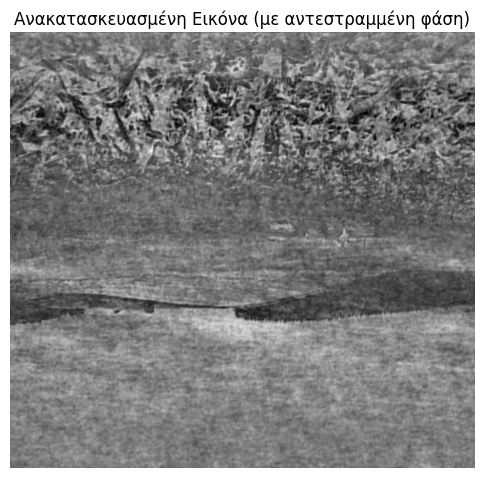

In [25]:
# Γ1. Επαναφορά του κεντραρισμένου φάσματος (αντιστροφή του fftshift)
F_inv_shifted = np.fft.ifftshift(F_modified)

# Γ2. Εφαρμογή του αντίστροφου μετασχηματισμού Fourier
image_reconstructed = ifft2(F_inv_shifted)

# Γ3. Εξαγωγή μόνο του πραγματικού μέρους (αφαιρούμε τυχόν φανταστικά λόγω υπολογιστικών σφαλμάτων)
image_reconstructed_real = np.abs(image_reconstructed)

# Γ4. Εμφάνιση της τροποποιημένης εικόνας
plt.figure(figsize=(6, 6))
plt.imshow(image_reconstructed_real, cmap="gray")
plt.title("Ανακατασκευασμένη Εικόνα (με αντεστραμμένη φάση)")
plt.axis("off")
plt.show()